In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/sms-spam-collection-dataset/spam.csv


# **SPAM SMS DETECTION**

# import libraries 

In [71]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, precision_score, recall_score, f1_score, r2_score
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.preprocessing import LabelEncoder

In [27]:
# Load the dataset
df = pd.read_csv("/kaggle/input/sms-spam-collection-dataset/spam.csv", encoding='latin-1', engine="python")

In [28]:
# Select only the 'v1' and 'v2' columns
df = df[["v1", "v2"]]

In [29]:
# Rename the columns
df.columns = ["Labels", "Messages"]

In [31]:
# Explore the dataset
print("Dataset Shape:", df.shape)
print("------------------------------------------")
print("Dataset Info:")
print(df.info())
print("------------------------------------------")
print("Dataset Description:")
print(df.describe())
print("------------------------------------------")

Dataset Shape: (5572, 2)
------------------------------------------
Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Labels    5572 non-null   object
 1   Messages  5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB
None
------------------------------------------
Dataset Description:
       Labels                Messages
count    5572                    5572
unique      2                    5169
top       ham  Sorry, I'll call later
freq     4825                      30
------------------------------------------


In [32]:
# Check for missing values
if df.isnull().values.any():
    print("Missing values found!")
else:
    print("No missing values found.")

No missing values found.


In [33]:
# Check for duplicates
if df.duplicated().values.any():
    print("Duplicates found!")
    num_duplicates = df.duplicated().sum()
    print(f"Number of duplicates: {num_duplicates}")
    df.drop_duplicates(inplace=True)
    print("Duplicates removed.")
else:
    print("No duplicates found.")


Duplicates found!
Number of duplicates: 403
Duplicates removed.


In [34]:
# Print the updated dataset
print("Updated Dataset:")
print(df.head())

Updated Dataset:
  Labels                                           Messages
0    ham  Go until jurong point, crazy.. Available only ...
1    ham                      Ok lar... Joking wif u oni...
2   spam  Free entry in 2 a wkly comp to win FA Cup fina...
3    ham  U dun say so early hor... U c already then say...
4    ham  Nah I don't think he goes to usf, he lives aro...


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Figure size 800x600 with 0 Axes>

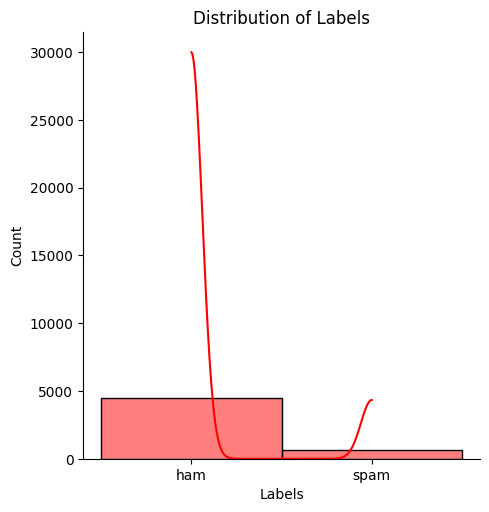

In [44]:
plt.figure(figsize=(8,6))
sns.displot(df.Labels,kde=True, color="red")
plt.title("Distribution of Labels")
plt.xlabel("Labels")
plt.ylabel("Count")
plt.show()

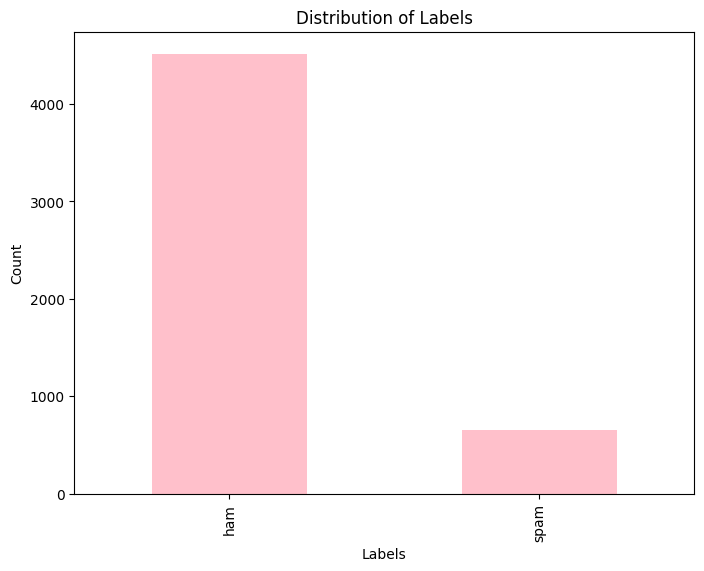

In [45]:
plt.figure(figsize=(8,6))
df['Labels'].value_counts().plot(kind='bar', color='pink')
plt.title("Distribution of Labels")
plt.xlabel("Labels")
plt.ylabel("Count")
plt.show()

# Label encoder


In [81]:
le = LabelEncoder()
df['Labels'] = le.fit_transform(df['Labels'])


In [48]:
df.head()

,Labels,Messages
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


# TF-IDF Vectorization

In [49]:
vectorizer = TfidfVectorizer(stop_words='english')

In [83]:
vectorizer = TfidfVectorizer(stop_words='english')
X = vectorizer.fit_transform(df["Messages"])
X.toarray()

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [53]:
y = df["Labels"]

In [54]:
X.shape

(5169, 8404)

In [55]:
y.shape

(5169,)

In [57]:
df.count()

Labels      5169
Messages    5169
dtype: int64

In [58]:
p, k = len(df.loc[df['Labels'] == 0]), len(df.loc[df['Labels'] == 1])

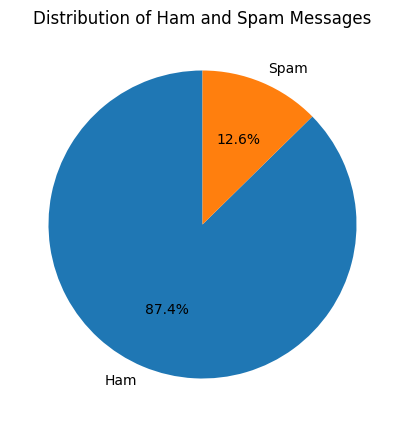

In [60]:
label = np.array(["Ham", "Spam"])
values = np.array([p, k])
plt.figure(figsize=(5, 5))
plt.pie(values, labels=label, autopct="%.1f%%", startangle=90)
plt.title("Distribution of Ham and Spam Messages")
plt.show()

In [61]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Naive Bayes model

In [65]:
# Train the Naive Bayes model
naive_bayes_model = MultinomialNB()
naive_bayes_model.fit(X_train, y_train)

# Make predictions on the test set
nb_predictions = naive_bayes_model.predict(X_test)

# Evaluate the model
print("Naive Bayes Model:")
print("------------------------------------------")
print("Confusion Matrix:")
print(confusion_matrix(y_test, nb_predictions))
print("------------------------------------------")
print("\nClassification Report:")
print("------------------------------------------")
print(classification_report(y_test, nb_predictions))
print("------------------------------------------")
print(f"\nAccuracy: {accuracy_score(y_test, nb_predictions):.3f}")
print(f"R2 Score: {r2_score(y_test, nb_predictions):.3f}")
print(f"Precision: {precision_score(y_test, nb_predictions):.3f}")
print(f"Recall: {recall_score(y_test, nb_predictions):.3f}")
print(f"F1 Score: {f1_score(y_test, nb_predictions):.3f}")

Naive Bayes Model:
------------------------------------------
Confusion Matrix:
[[889   0]
 [ 36 109]]
------------------------------------------

Classification Report:
------------------------------------------
              precision    recall  f1-score   support

           0       0.96      1.00      0.98       889
           1       1.00      0.75      0.86       145

    accuracy                           0.97      1034
   macro avg       0.98      0.88      0.92      1034
weighted avg       0.97      0.97      0.96      1034

------------------------------------------

Accuracy: 0.965
R2 Score: 0.711
Precision: 1.000
Recall: 0.752
F1 Score: 0.858


# Logistic Regression model

In [69]:
# Train the Logistic Regression model
logistic_regression_model = LogisticRegression()
logistic_regression_model.fit(X_train, y_train)

# Make predictions on the test set
lr_predictions = logistic_regression_model.predict(X_test)

# Evaluate the model
print("Logistic Regression Model:")
print("------------------------------------------")
print("Confusion Matrix:")
print(confusion_matrix(y_test, lr_predictions))
print("------------------------------------------")
print("\nClassification Report:")
print(classification_report(y_test, lr_predictions))
print("------------------------------------------")
print(f"\nAccuracy: {accuracy_score(y_test, lr_predictions):.3f}")
print(f"R2 Score: {r2_score(y_test, lr_predictions):.3f}")
print(f"Precision: {precision_score(y_test, lr_predictions):.3f}")
print(f"Recall: {recall_score(y_test, lr_predictions):.3f}")
print(f"F1 Score: {f1_score(y_test, lr_predictions):.3f}")

Logistic Regression Model:
------------------------------------------
Confusion Matrix:
[[887   2]
 [ 56  89]]
------------------------------------------

Classification Report:
              precision    recall  f1-score   support

           0       0.94      1.00      0.97       889
           1       0.98      0.61      0.75       145

    accuracy                           0.94      1034
   macro avg       0.96      0.81      0.86      1034
weighted avg       0.95      0.94      0.94      1034

------------------------------------------

Accuracy: 0.944
R2 Score: 0.535
Precision: 0.978
Recall: 0.614
F1 Score: 0.754


# Support Vector Machine (SVM) model

In [77]:
from sklearn import svm
# Train the Support Vector Machine (SVM) model
svm_model = svm.SVC(kernel='linear')
svm_model.fit(X_train, y_train)

# Make predictions on the test set
svm_predictions = svm_model.predict(X_test)

# Evaluate the model
print("Support Vector Machine (SVM) Model:")
print("------------------------------------------")
print("Confusion Matrix:")
print(confusion_matrix(y_test, svm_predictions))
print("------------------------------------------")
print("\nClassification Report:")
print(classification_report(y_test, svm_predictions))
print("------------------------------------------")
print(f"\nAccuracy: {accuracy_score(y_test, svm_predictions):.3f}")
print(f"R2 Score: {r2_score(y_test,svm_predictions):.3f}")
print(f"Precision: {precision_score(y_test, svm_predictions):.3f}")
print(f"Recall: {recall_score(y_test, svm_predictions):.3f}")
print(f"F1 Score: {f1_score(y_test, svm_predictions):.3f}")

Support Vector Machine (SVM) Model:
------------------------------------------
Confusion Matrix:
[[886   3]
 [ 20 125]]
------------------------------------------

Classification Report:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       889
           1       0.98      0.86      0.92       145

    accuracy                           0.98      1034
   macro avg       0.98      0.93      0.95      1034
weighted avg       0.98      0.98      0.98      1034

------------------------------------------

Accuracy: 0.978
R2 Score: 0.816
Precision: 0.977
Recall: 0.862
F1 Score: 0.916
